In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!unzip '/content/drive/My Drive/PMEmo2019.zip'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim 
import nltk
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
%matplotlib inline

In [4]:
df = pd.read_csv('/content/PMEmo2019/annotations/static_annotations.csv')
df.shape

(767, 3)

In [5]:
len(df['musicId'].unique())

767

In [0]:
df2 = df
df2['Arousal(mean)'] = df2['Arousal(mean)'] - 0.5000
df2['Valence(mean)'] = df2['Valence(mean)'] - 0.5000

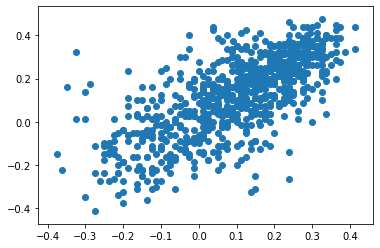

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df2['Valence(mean)'], df2['Arousal(mean)'])
plt.show()

In [8]:
df2['temp'] = ''
df2.head()

,musicId,Arousal(mean),Valence(mean),temp
0,1,-0.1000,0.0750,
1,4,-0.2375,-0.2125,
2,5,-0.3500,-0.3000,
3,6,0.0125,-0.1500,
4,7,0.2000,0.2250,


In [9]:
dict1 = {1:'angry', 2:'sad', 3:'happy', 4:'surprised', 5:'neutral', 6:'afraid'}
y = []
for row in df2.index:
  if(df2['Valence(mean)'][row] > 0):
    if(df2['Arousal(mean)'][row] < 0.2 and df2['Arousal(mean)'][row] > 0):           #happy
      y.append(3)
      df2['temp'].loc[row] = 1 
    elif(df2['Arousal(mean)'][row] > 0.2):                                           #surprised
      y.append(4)
      df2['temp'].loc[row] = 1
    elif(df2['Arousal(mean)'][row] < 0 and df2['Arousal(mean)'][row] > -0.1):        #happy
      y.append(3)
      df2['temp'].loc[row] = 1
    elif(df2['Arousal(mean)'][row] < -0.1 and df2['Arousal(mean)'][row] > -0.4):     #neutral, calm
      y.append(5)
      df2['temp'].loc[row] = 1

  else:
    if(df2['Arousal(mean)'][row] > 0 and df2['Arousal(mean)'][row] < 0.3):           #angry
      y.append(1)
      df2['temp'].loc[row] = 1
    elif(df2['Arousal(mean)'][row] > 0.3):                                           #afraid
      y.append(6)
      df2['temp'].loc[row] = 1
    elif(df2['Arousal(mean)'][row] < 0 and df2['Arousal(mean)'][row] > -0.3):        #sad
      y.append(2) 
      df2['temp'].loc[row] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
np.shape(y)

(746,)

In [11]:
df2.shape

(767, 4)

In [12]:
df3 = df2[df2['temp'] == 1]
df3['labels'] = y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df3.head()

,musicId,Arousal(mean),Valence(mean),temp,labels
0,1,-0.1000,0.0750,1,3
1,4,-0.2375,-0.2125,1,2
3,6,0.0125,-0.1500,1,1
4,7,0.2000,0.2250,1,3
5,8,-0.1125,-0.2750,1,2


In [14]:
len(df3['musicId'].unique())

746

In [15]:
features1 = pd.read_csv('/content/PMEmo2019/features/static_features.csv')
len(features1['musicId'].unique())
features1.shape

(794, 6374)

In [16]:
features2 = pd.read_csv('/content/PMEmo2019/features/dynamic_features.csv')
len(features2['musicId'].unique())

794

In [17]:
arr = df3['musicId'].unique()
len(arr)

746

In [0]:
features_new = features1.loc[features1['musicId'].isin(arr)]

In [19]:
features1.shape

(794, 6374)

In [20]:
features_new.shape

(746, 6374)

In [0]:
a = df3['musicId'].value_counts()

In [22]:
!sudo pip install pylrc

  Created wheel for pylrc: filename=pylrc-0.1.0-cp36-none-any.whl size=4353 sha256=5d21f4ac64f25f9606714cb5f00a354635f434ad342515dde31926504c5d0012
  Stored in directory: /root/.cache/pip/wheels/48/f8/8d/7cff8d34e7e0776585aa5381bb437126a5ec098b020ffcfc23
Successfully built pylrc


In [23]:
import pylrc

lrc_file = open('/content/PMEmo2019/lyrics/1.lrc')
x = ''.join(lrc_file.readlines())
lrc_file.close()
x

"[by:Trap_Girl]\n[00:03.00]Uhh, (yeah) alright\n[00:12.28]I did it, hahah, yeah\n[00:14.62]Used to treat my mattress like the ATM, yeah\n[00:18.34]Bond number 9 that's my favorite scent, yeah\n[00:21.93]Can't forget the kush, I'm talking OG, yeah\n[00:25.64]Rest in peace to pop, he was an OG, oh yeah\n[00:29.40]285 I had that pack on me, uh\n[00:33.07]I cannot forget I had that strap on me, yeah\n[00:36.67]Rest in peace to my nigga Doe (Doe TRU)\n[00:40.49]All we ever want to do is ball\n[00:43.23]That was the easy part\n[00:45.34]We playing that Weezy hard\n[00:47.03]We sit in the kitchen late\n[00:48.84]We tryna to make an escape\n[00:50.80]Trying to make me a mil\n[00:52.66]So I'ma keep me a plate\n[00:54.47]I told 'em shawty can leave\n[00:56.46]So I'mma keep me a rake\n[00:58.24]So I'ma keep me a Wraith\n[01:00.05]My jewelry look like a lake\n[01:02.01]Today I'm in the Maybach\n[01:03.72]And that car came with some drapes\n[01:05.66]You know I look like a safe\n[01:07.40]I put you

In [24]:
lyrics = pd.DataFrame()
lyrics['musicId'] = df3['musicId']
lyrics['lyrics'] = ''
lyrics.head()

,musicId,lyrics
0,1,
1,4,
3,6,
4,7,
5,8,


In [0]:
import re
y = re.sub("\d+", "", x)
z = re.compile('\w+').findall(y)

In [26]:
df3.index

Int64Index([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            757, 758, 759, 760, 761, 762, 763, 764, 765, 766],
           dtype='int64', length=746)

In [0]:
import os
p = []
for i in os.listdir('/content/PMEmo2019/lyrics/'):
  p.append(i[:-4]) 

In [28]:
np.shape(p)

(629,)

In [0]:
df4 = df3[df3['musicId'].isin(p)]

In [30]:
for i in df4.index:
  lrc_file = open('/content/PMEmo2019/lyrics/%d.lrc' % df4['musicId'].loc[i])
  x = ''.join(lrc_file.readlines())
  lrc_file.close()
  y = re.sub('[^A-Za-z]', '', x)
  z = re.compile('\w+').findall(y)
  lyrics['lyrics'].loc[i] = x

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
lyrics.head()

,musicId,lyrics
0,1,"[by:Trap_Girl]\n[00:03.00]Uhh, (yeah) alright\..."
1,4,
3,6,"[by:OctobersVeryOwn]\n[00:02.23]Yeah, Yeah, Ye..."
4,7,
5,8,


In [0]:
lyrics['lyrics'].replace('', np.nan, inplace=True)
lyrics.dropna(subset=['lyrics'], inplace=True)

In [33]:
lyrics.shape

(592, 2)

In [34]:
df4.shape

(592, 5)

In [35]:
lyrics['lyrics'].apply(lambda x: x.split()) # tokenizing 
lyrics.head()

,musicId,lyrics
0,1,"[by:Trap_Girl]\n[00:03.00]Uhh, (yeah) alright\..."
3,6,"[by:OctobersVeryOwn]\n[00:02.23]Yeah, Yeah, Ye..."
6,9,[by:i6lll]\n[Created in LyricsEditor]\n[Availa...
7,10,[by:小陀螺Tony]\n[00:06.460]I'm drownin'\n[00:08....
8,12,[by:ismellYouOnmyskin]\n[00:16.41]( Q-Tip: )\n...


In [36]:
df4.head()

,musicId,Arousal(mean),Valence(mean),temp,labels
0,1,-0.1000,0.0750,1,3
3,6,0.0125,-0.1500,1,1
6,9,-0.0500,-0.2125,1,2
7,10,-0.0625,-0.0750,1,2
8,12,0.1875,0.0750,1,3


In [70]:
letters_only = re.sub("[^a-zA-Z]", " ", str([i for i in lyrics['lyrics']]))
l = re.sub(' +', ' ', letters_only)
l

' by Trap Girl n Uhh yeah alright n I did it hahah yeah n Used to treat my mattress like the ATM yeah n Bond number that s my favorite scent yeah n Can t forget the kush I m talking OG yeah n Rest in peace to pop he was an OG oh yeah n I had that pack on me uh n I cannot forget I had that strap on me yeah n Rest in peace to my nigga Doe Doe TRU n All we ever want to do is ball n That was the easy part n We playing that Weezy hard n We sit in the kitchen late n We tryna to make an escape n Trying to make me a mil n So I ma keep me a plate n I told em shawty can leave n So I mma keep me a rake n So I ma keep me a Wraith n My jewelry look like a lake n Today I m in the Maybach n And that car came with some drapes n You know I look like a safe n I put you back in your place n I look you right in your face n Sing to your bitch like I m Drake n Yeah n Good drank big knots n Good drugs I put a four on the rocks lean n Drop top no hot box n tried to pull me over pink slips to the cops n She sa

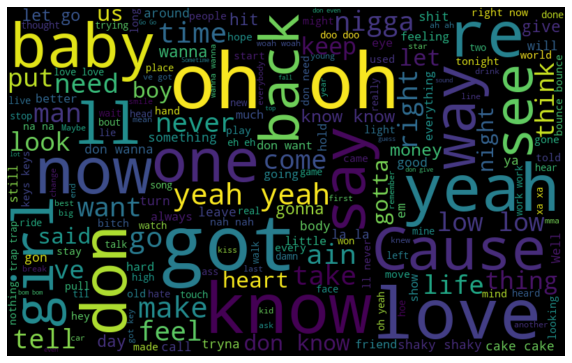

In [71]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(letters_only) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 

In [73]:
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform() 
tfidf.shape

ValueError: ignored

In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(tfidf, df4['labels'],random_state=0,test_size=0.2)

In [43]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth = 11, random_state = 0, max_leaf_nodes= 50, min_samples_split= 12)
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

print(accuracy_score(ytest, ypred))

0.3697478991596639


In [51]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', random_state= 0, max_iter = 650)
mlp.fit(xtrain, ytrain)
ypred2 = mlp.predict(xtest)

print(accuracy_score(ytest, ypred2))

0.3277310924369748


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 800, random_state = 0)
rf.fit(xtrain, ytrain)
ypred3 = dt.predict(xtest)

print(accuracy_score(ytest, ypred3))

0.3697478991596639


In [0]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import one_hot

text = l
result = text_to_word_sequence(text)
print(result)

words = set(result)
vocab_size = len(words)
print(vocab_size)
result = one_hot(text, round(vocab_size*1.3))
print(result)

In [0]:
from keras.preprocessing.text import Tokenizer

t = Tokenizer(num_words = 200, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
t.fit_on_texts(l)

In [78]:
word_index = t.word_index
print('Found %s unique tokens.' % len(word_index))

Found 26 unique tokens.


In [87]:
from keras.preprocessing.sequence import pad_sequences

X = t.texts_to_sequences(lyrics['lyrics'].values)
X = pad_sequences(X, maxlen=200)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (592, 200)


In [88]:
y = pd.get_dummies(df4['labels']).values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (592, 6)


In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y,random_state=0,test_size=0.2)

In [58]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-11-15 06:07:30--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-11-15 06:07:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-11-15 06:07:31--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [59]:
!unzip '/content/glove.6B.zip'

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
embeddings_index = dict()
f = open('/content/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [0]:
vocabulary_size = 55
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, index in t.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [0]:
from keras.models import Sequential, Model
from keras.layers import Embedding, SpatialDropout1D, Dense, LSTM, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout

model = Sequential()
model.add(Embedding(vocabulary_size, 100, weights=[embedding_matrix], input_length=X.shape[1], trainable = False))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_acc', mode='max', patience = 200)
mc = ModelCheckpoint('emotion_best_02.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          5500      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 196, 64)           32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 98, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 94, 128)           41088     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)              

In [92]:
history = model.fit(X, y, epochs=400, validation_split=0.3, callbacks= [es, mc])

Train on 414 samples, validate on 178 samples
Epoch 1/400
414/414 [==============================] - 0s 322us/step - loss: 0.2067 - acc: 0.9034 - val_loss: 3.3838 - val_acc: 0.3483

Epoch 00001: val_acc improved from -inf to 0.34831, saving model to emotion_best_02.h5
Epoch 2/400
414/414 [==============================] - 0s 309us/step - loss: 0.2066 - acc: 0.9155 - val_loss: 3.3665 - val_acc: 0.3371

Epoch 00002: val_acc did not improve from 0.34831
Epoch 3/400
414/414 [==============================] - 0s 315us/step - loss: 0.2069 - acc: 0.9203 - val_loss: 3.3798 - val_acc: 0.3596

Epoch 00003: val_acc improved from 0.34831 to 0.35955, saving model to emotion_best_02.h5
Epoch 4/400
414/414 [==============================] - 0s 305us/step - loss: 0.2221 - acc: 0.9082 - val_loss: 3.3455 - val_acc: 0.3371

Epoch 00004: val_acc did not improve from 0.35955
Epoch 5/400
414/414 [==============================] - 0s 326us/step - loss: 0.2318 - acc: 0.9034 - val_loss: 3.5322 - val_acc: 0.342